In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from imblearn.over_sampling import SMOTE

from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import seaborn as sns

In [2]:
def get_auc_scores(clf, X_train, X_test, y_train, y_test):
    '''Prints the AUC scores for training and testing data
    and returns testing score'''

    y_train_score = clf.predict_proba(X_train)[:, 1]
    y_test_score = clf.predict_proba(X_test)[:, 1]
    print('Training AUC:' , roc_auc_score(y_train, y_train_score))
    print('Testing AUC: ', roc_auc_score(y_test, y_test_score))
 
    return y_test_score

def plot_roc_curve(y_test, y_test_score):
    '''Plot ROC curve for testing data'''
    fpr, tpr, _ = roc_curve(y_test, y_test_score)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
#     plt.plot([0, 1], [0, 1], 'k — ')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc='lower right')
    plt.show()

#https://medium.com/swlh/how-to-code-and-evaluate-of-decision-trees-2d94093b3c1a

In [3]:
path = pd.read_csv("../Data/cleansed_final.csv")

In [5]:
final = path[["MSI","Under50","TILS", "Stage12", "Signet", "RightSide","NoNecrosis", "Mucin", "ModDiff", "HistHet", "Female", "Expansile", "CrohnMissing", "Crohn", "AngioLymph"]]

In [6]:
# dont use NoNecrosis; turn the feature handling around

In [7]:
final["MSI"].value_counts()

0    1603
1     307
Name: MSI, dtype: int64

In [8]:
## fix random seed
import random
random.seed(222)

In [9]:
X = final.drop("MSI", axis=1)

In [10]:
y = final["MSI"]

In [11]:
# X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size=.3, random_state=1)
## train test val
## 81 : 9 : 10
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.1, random_state=1)

In [12]:
## use smote to deal with imbalanced data by oversampling
oversample = SMOTE(random_state = 170)
X_smote, y_smote = oversample.fit_resample(X_train, y_train)

## PCA to reduce dimensions for X_train and X_test

In [13]:
pca = PCA(n_components=3)

In [14]:
X_train_pca = pca.fit_transform(X_smote)

In [15]:
X_train_pca.shape

(2594, 3)

In [16]:
y_smote.shape

(2594,)

In [19]:
X_test_pca = pca.fit_transform(X_test)

In [20]:
X_test_pca.shape

(191, 3)

## K Nearest Neighbors

In [27]:
clf = KNeighborsClassifier(n_neighbors=5)
clf = clf.fit(X_train_pca, y_smote)

In [22]:
y_pred = clf.predict(X_test_pca)

In [23]:
print(confusion_matrix(y_test, y_pred))

[[110  54]
 [ 17  10]]


In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.67      0.76       164
           1       0.16      0.37      0.22        27

    accuracy                           0.63       191
   macro avg       0.51      0.52      0.49       191
weighted avg       0.77      0.63      0.68       191



In [25]:
print(roc_auc_score(y_test, y_pred))

0.5205510388437217


Training AUC: 0.8531540967858333
Testing AUC:  0.5887533875338753


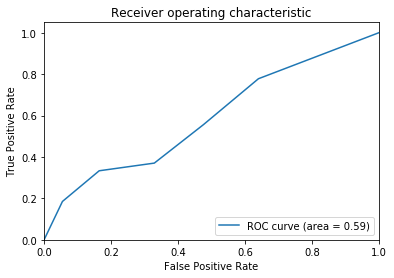

In [26]:
## AUC ROC curve
y_test_score = get_auc_scores(clf, X_train_pca, X_test_pca, y_smote, y_test)

plot_roc_curve(y_test, y_test_score)

KNN predicted linear model. 